# Practical Exam (CSC 4780/6780) -- April 25th, 2020 (10:00 AM- 5:00 PM)
## Submit your answers to iCollege. Do not email. Multiple submissions are allowed.

_This is an open book exam. During the exam, you are allowed to use course materials (notes, slides, sample codes, homework assignments) or external resources (such as library documentation or example code pieces). However, you must not get help from any individual, including your peers in this class._


By submitting your answers, you certify that the answers is your own work, based on your personal study and research, and that you have not copied in part or whole or otherwise plagiarised the work of other students and/or persons. You also certify that you have read and understood the class policies and consequences of academic dishonesty as explained in the class website (https://grid.cs.gsu.edu/~baydin2/courses/csc4780/index.html and references/links therein)

## Dataset and Background
Food spectrographs are used in chemometrics to classify food types, a task that has obvious applications in food safety and quality assurance. You are given a time series dataset obtained after spectral analysis of fresh fruit purees [(Holland et al. 1999)](https://doi.org/10.1002/(SICI)1097-0010(199802)76:2%3C263::AID-JSFA943%3E3.0.CO;2-F). The classes are strawberry (authentic samples) and non-strawberry (adulterated strawberries and other fruits) [encoded as `S1` and `S2`]. The dataset contains 983 time series instances. Each timseries has a length of 235. Note here that time series are stored in the rows. The data can be read from `Strawberry_TS.csv` (therefore, place it in the same directory as this starter code). In this practical exam, you will explore this data and build predictive models. Note here that while the specifics and details of data is given for completeness, they are not relevant for the exam.

The values of time series are represented in the cells corresponding to columns $\{t0, t1, ... t234\}$.
The `index` is the identifier of the instances. The `Class` column shows the class of time series and is your target variable. 


In [245]:
# run the below code to load time series dataset
import pandas as pd
import numpy as np
import seaborn as sns

ts_df = pd.read_csv('Strawberry_TS.csv', index_col=0)
ts_df_c = ts_df.copy()

# ts_df
ts_df.head()

,Class,t0,t1,t2,t3,t4,t5,t6,t7,t8,...,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234
ins0,S2,-0.427551,-0.423887,-0.414360,-0.387491,-0.330333,-0.275372,-0.248747,-0.253633,-0.279036,...,-0.966893,-0.991564,-1.009640,-1.019899,-1.027960,-1.031868,-1.034066,-1.035776,-1.037486,-1.039440
ins1,S2,-0.313815,-0.313110,-0.299480,-0.266110,-0.221460,-0.162945,-0.123230,-0.124875,-0.151665,...,-0.948080,-0.961945,-0.974400,-0.984740,-0.989675,-0.994140,-0.994375,-0.994610,-0.998370,-0.998370
ins2,S1,-0.439104,-0.432493,-0.431269,-0.408253,-0.351938,-0.288032,-0.255957,-0.261344,-0.278238,...,-0.991974,-1.007889,-1.020621,-1.029191,-1.033353,-1.035802,-1.036291,-1.037026,-1.039964,-1.039964
ins3,S2,-0.399509,-0.385600,-0.362244,-0.322354,-0.254122,-0.179591,-0.121331,-0.096137,-0.113458,...,-1.059527,-1.079210,-1.091019,-1.097317,-1.102566,-1.105978,-1.111489,-1.115950,-1.115425,-1.115425
ins4,S2,-0.497904,-0.502622,-0.511010,-0.494234,-0.461208,-0.441287,-0.453344,-0.489254,-0.522018,...,-0.927249,-0.947694,-0.971547,-0.994089,-1.020300,-1.045463,-1.065908,-1.086615,-1.102342,-1.102342


## Question 1 (15 points)
Your first task is to create an analytics base table from the given time series dataset.
The dataset will contain simple statistical features of time series. Those features are the following: 
- mean (column: mean)
- standard deviation (column: std)
- minimum (column: min)
- 1st quartile (column: Q1)
- median (column: median)
- 3rd quartile (column: Q3)
- maximum (column: max)
- interquartile range (column: IQR)

You will also need to fetch the target variable to `class` column.

Below, a pandas DataFrame object (`abt`) is created for you (dimensions: __983 rows × 9 columns__) with proper index and column names. Feel free to use it. 
In the end, you will have 983 instances with eight descriptive features and a target variable.

In [247]:
abt = pd.DataFrame(index = ts_df.index, columns = ['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR', 'class'])

abt['mean'] = ts_df[:].mean(axis=1)
abt['std'] = ts_df[:].std(axis=1)
abt['min'] = ts_df[:].min(axis=1)
abt['Q1'] = ts_df[:].quantile([0.25],axis=1).T
abt['median'] = ts_df[:].median(axis=1)
abt['Q3'] = ts_df[:].quantile([0.75],axis=1).T
abt['max'] = ts_df[:].max(axis=1)
abt['IQR'] = abt['Q3'] - abt['Q1']
abt['class'] =ts_df['Class']

display(abt.head(20))

,mean,std,min,Q1,median,Q3,max,IQR,class
ins0,3.225531e-10,1.0,-1.039440,-0.847324,-0.079959,0.181530,3.118721,1.028854,S2
ins1,9.021268e-11,1.0,-1.347345,-0.824117,-0.098085,0.152777,3.232569,0.976895,S2
ins2,8.476595e-10,1.0,-1.039964,-0.821069,-0.089460,0.176569,3.181970,0.997638,S1
ins3,1.140000e-09,1.0,-1.115950,-0.827143,-0.131828,0.141495,3.193192,0.968638,S2
ins4,-1.282553e-09,1.0,-1.102342,-0.819913,0.041268,0.251878,3.023882,1.071791,S2
ins5,6.485107e-10,1.0,-1.039217,-0.802941,-0.123510,0.108436,3.617034,0.911378,S2
ins6,9.127660e-10,1.0,-1.365525,-0.848080,0.000208,0.374532,2.980046,1.222613,S2
ins7,3.944680e-10,1.0,-1.053614,-0.853232,-0.003116,0.230971,3.054648,1.084203,S2
ins8,-6.136170e-10,1.0,-1.419145,-0.849529,0.051361,0.417567,2.898107,1.267096,S2
ins9,9.174467e-10,1.0,-1.029284,-0.862711,-0.093718,0.090637,3.017820,0.953348,S2


<font color=red>**Next three questions will use the analytical base table (ABT) created in Question 1. For those who want to skip to Questions 2-4, they can load a sample ABT (`sampleABT.csv`).** </font>

## Question 2 (30 points)

Using the dataset (i.e., analytical base table) you created in **Question 1**, analyze and interpret the relationships between the descriptive features and target feature. In this question you are expected to create 
1. a bar plot demonstrating the distribution of the target variable (see `class` column in `abt`) (**5 points**)
2. the correlation matrix of descriptive features (**5 points**)
3. a scatter plot matrix for descriptive features and target feature (Hint: `sns.pairplot`, also use the `hue` for answering the question) (**5 points**)

**Q2.1** After creating (1), answer the following questions:
- Is this dataset balanced? What is the class imbalance ratio (i.e., the ratio between the number of instances in majority class and the number of instances in minority class?) (**3 points**)
- If imbalanced, what can we do to balance the dataset? (**3 points**)

**Q2.2** After creating (2), answer the following questions:
- Among the pairs of descriptive features in correlation matrix, which two has the highest correlation? (**2 points**)
- Among the pairs of descriptive features in correlation matrix, which two has the lowest (negative) correlation? (**2 points**)

**Q2.3** After creating (3), answer the following questions:
- Based on your scatter plot matrix, which features are less likely to be important for predicting the target variable and why? (**5 points**)

Text(0.5, 1.0, 'Bar plot for Seat distribution')

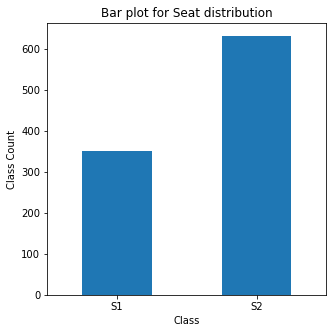

In [248]:
# Feel free to use as many cells as needed. Do not leave empty cells.
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))     
plt.subplot(1,1,1)
ts_df['Class'].value_counts()
ts_df['Class'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylabel('Class Count')
plt.title('Bar plot for Seat distribution')

In [249]:
corr = abt.corr()
display(corr)

,mean,std,min,Q1,median,Q3,max,IQR
mean,1.000000,0.447730,-0.000486,0.008106,-0.009276,-0.014188,0.011035,-0.014901
std,0.447730,1.000000,-0.042358,0.023336,-0.005467,0.018353,-0.041565,0.009234
min,-0.000486,-0.042358,1.000000,0.019478,-0.665050,-0.858368,0.716253,-0.761679
Q1,0.008106,0.023336,0.019478,1.000000,-0.483945,-0.260754,0.253186,-0.526532
median,-0.009276,-0.005467,-0.665050,-0.483945,1.000000,0.848735,-0.680219,0.891100
Q3,-0.014188,0.018353,-0.858368,-0.260754,0.848735,1.000000,-0.824715,0.958040
max,0.011035,-0.041565,0.716253,0.253186,-0.680219,-0.824715,1.000000,-0.801434
IQR,-0.014901,0.009234,-0.761679,-0.526532,0.891100,0.958040,-0.801434,1.000000


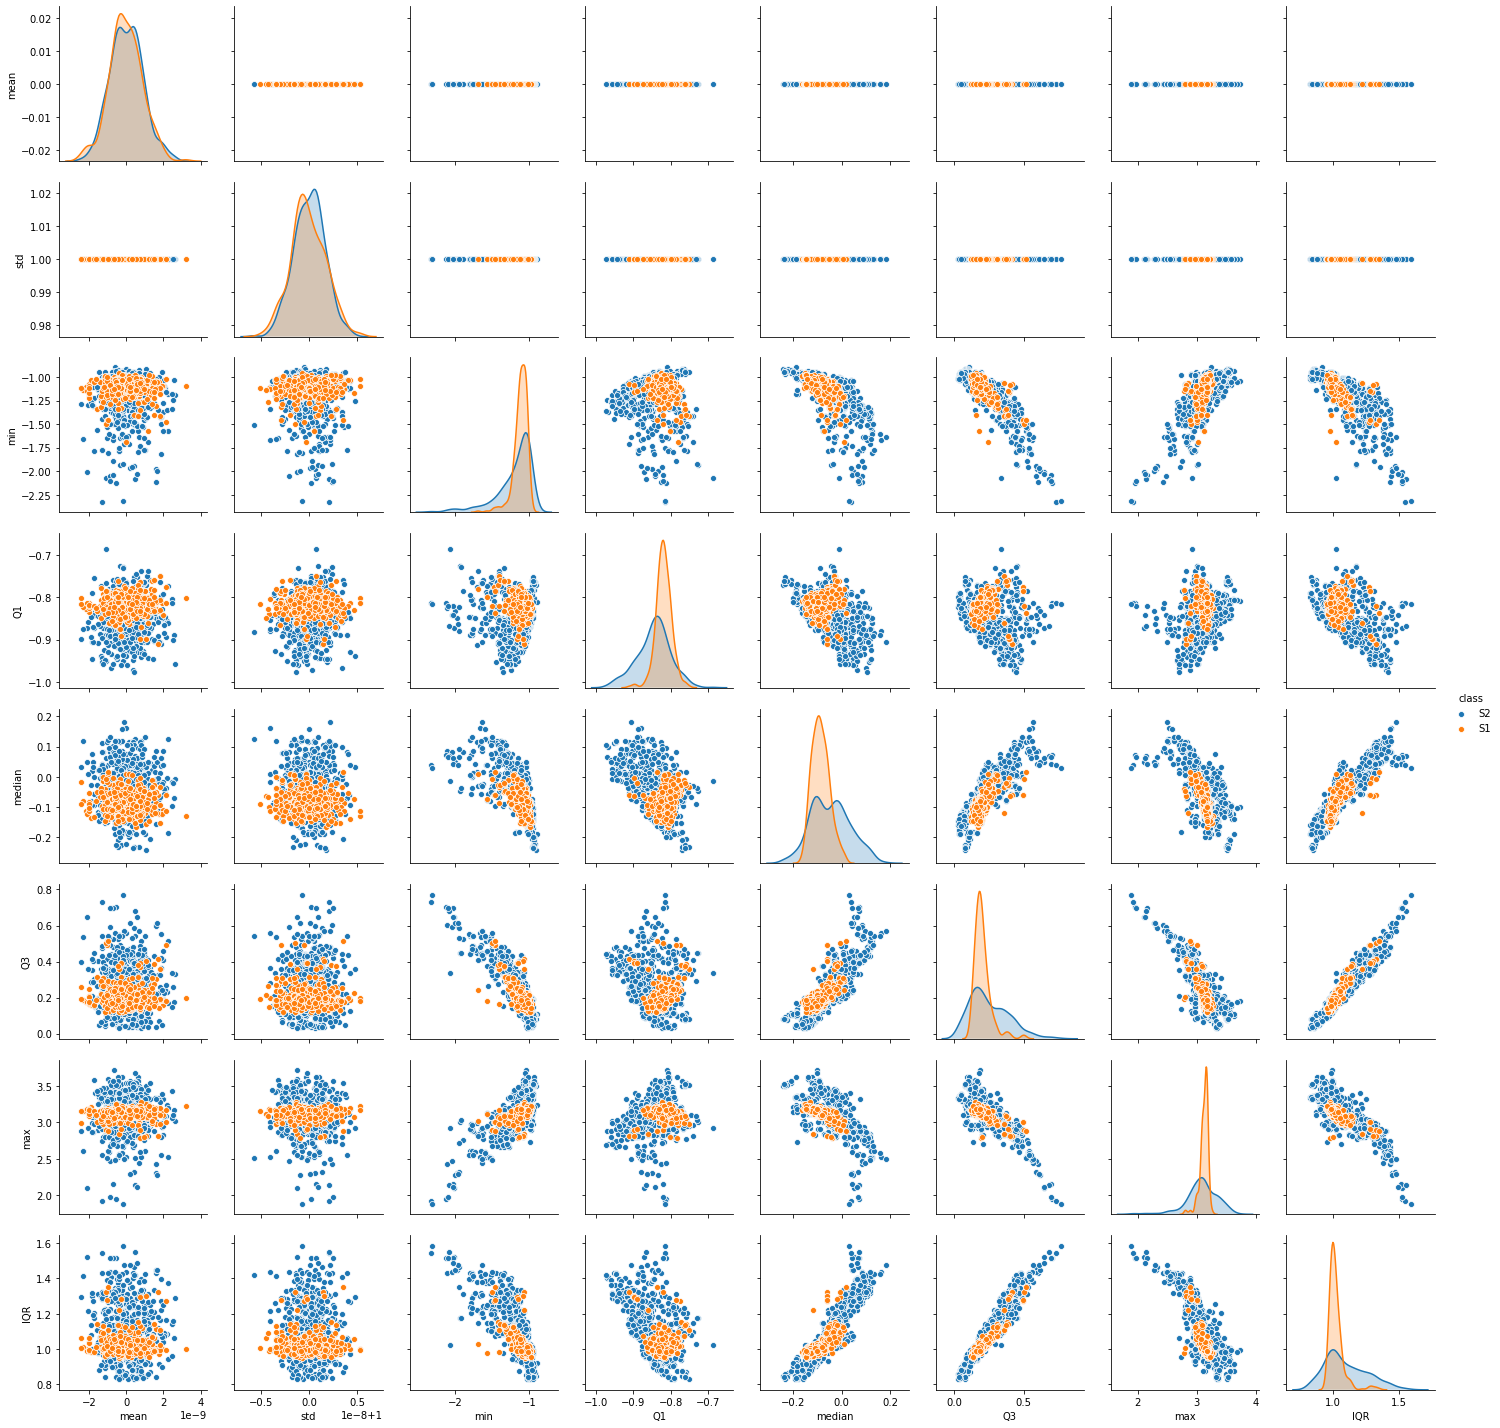

In [250]:
import seaborn as sns
sns.pairplot(abt, hue="class")

In [251]:
#Q2.1 

S1_Count = ts_df.Class.value_counts()['S1']
print('Minority Class Count is : ',S1_Count)

S2_Count = ts_df.Class.value_counts()['S2']
print('Majority Class count is ', S2_Count)

imbalanced_Ratio = round(S2_Count/S1_Count,2)
print(imbalanced_Ratio)

#The data set is not balanced because the Majority Class is farahead of the Minority Class
#In order to make it a balanced Dataset by keeping all the samples of the Minority class and randomly selecting the 
#equal number of samples of the Majority class. 

Minority Class Count is :  351
Majority Class count is  632
1.8


In [253]:
# Q2.2

unstack = corr.unstack()
sorted_values = unstack.sort_values()
sorted_values.drop_duplicates()
print(sorted_values.head(2))

#Hence the pair that has the lowest (negative) correlation is Q3,min

corr1 = ts_df.corr()
corr[corr == 1] = 0
unstack1 = corr.unstack()
sorted_values1 = unstack1.sort_values(ascending=False)
sorted_values1.drop_duplicates()
print(sorted_values1.head(2))

#The pair (Q3,IQR) has the Highest Correlation of 0.999996

Q3   min   -0.858368
min  Q3    -0.858368
dtype: float64
IQR  Q3     0.95804
Q3   IQR    0.95804
dtype: float64


In [ ]:
#Q2.3


## Question 3 (20+5 points)

Using the dataset (`abt`) you created in **Question 1**, create a logistic regression model. Your target feature is `class`, while your descriptive features are `['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR']`. (Hint: the model's class is imported in the preamble as 

`from sklearn.linear_model import LogisticRegression` 

and you can use the default model [without any input parameters]. Use 50% holdout sampling for evaluating this model.  (**8 pts**)

After you train your logistic regression model, test the performance of your model using your test set. 
When evaluating the model, you are expected to report the confusion matrix (**3 pts**), overall classification error [misclassification rate] (**3 pts**), the precision of the class `S1` (**3 pts**) and the recall of the class `S2` (**3 pts**). 

**Bonus Question** Output the classification accuracy and F1-score. Compare the similarities and differences between these two measures. Explain the reasons behind these similarities or differences. (**5 pts**)

In [223]:
# your answer goes here

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

X_Logistic =  abt.loc[:, abt.columns != 'class']
y_Logistic =  abt.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X_Logistic, y_Logistic, test_size = 0.5, random_state = 0)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

y_pred_Logistic = logisticRegr.predict(X_test)  

y_pred_Logistic_array1 = np.concatenate((y_pred_Logistic.reshape(len(y_pred_Logistic),1), (y_test.reshape(len(y_test),1) )),1)
df_Logistic = pd.DataFrame(y_pred_Logistic_array1,columns=['Predicted_Value','Original_Value'])
display(df_Logistic.head(15))
print('')

score = logisticRegr.score(X_test, y_test)
print('Accuarcy of the Model is : %',round(score*100),2)


#Confusion Matrix
print('Confuion Matrix is :')
cm = metrics.confusion_matrix(y_test, y_pred_Logistic)
print(cm)

#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

Classify=round((TP + TN) / float(TP + TN + FP + FN),3)
MisClassify=round((FP + FN) / float(TP + TN + FP + FN),3)

print('')
print('----------Classifiction------------')
print('Classifiction Ratio is ',Classify)
print('Mis Classifiction Ratio is ',MisClassify)
print('')

print('------------Precision--------------')
precision = TP / float(TP + FP)
print(round(precision,3))
print('')

print('-------------Recal-----------------')
recall = TP / float(TP + FN)
print(round(recall,3))


print('')


,Predicted_Value,Original_Value
0,S2,S1
1,S2,S2
2,S2,S2
3,S2,S2
4,S2,S1
5,S2,S2
6,S2,S2
7,S2,S1
8,S2,S1
9,S2,S1



Accuarcy of the Model is : % 60.0 2
Confuion Matrix is :
[[  0 171]
 [ 28 293]]

----------Classifiction------------
Classifiction Ratio is  0.596
Mis Classifiction Ratio is  0.404

------------Precision--------------
0.631

-------------Recal-----------------
0.913

Classificatio_Rate is : 0.6

-------------F1 Score--------------
F1 Score is
0.75


In [224]:
# your answer to bonus question goes here
Classificatio_Rate=round((TP + TN) / float(TP + TN + FP + FN),3)
print('Classificatio_Rate is :', round(Classificatio_Rate,2))

print('')
print('-------------F1 Score--------------')
F1 = 2 * (precision * recall) / (precision + recall)
print('F1 Score is')
print(round(F1,2))


#Primary difference between F1_score and Classification is. The formulae explained above itself demonstrates the difference
# between the F1 and Classification score. Accuracy is used when the True Positives and True negatives are more important while
# F1-score is used when the False Negatives and False Positives are crucial.

#We dont consider True Positives and there is an equal priority to FP and FN

Classificatio_Rate is : 0.6

-------------F1 Score--------------
F1 Score is
0.75


## Question 4 (35+5 points)

In this part, you are expected to create a set of random forest models to understand the impact of the estimator count (i.e., number of weak learners) in these ensemble models. You will again be using the dataset (`abt`) created in **Question 1**. Similar to **Question 3**, the target feature is `class`, and you are expected to use all the descriptive features, i.e., `['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR']`. 

More specifically, the task here is to build random forest classifiers (`RandomForestClassifier` in scikit-learn) under six different parametric settings where number of estimators ($n$) is set to a number from `[1, 10, 50, 100, 500, 1000]`. This means that for every $n$ in the list, you need to repeat the experiment. Feel free to use the `cv_scores` given in the preamble.

Each experiment will use an 8-fold cross validation evaluation schema. For each value of the $n$ parameter, report the mean and the standard deviation of classification accuracies. (Hint: `RandomForestClassifier` uses the parameter `n_estimators` for setting the number of estimators to be built.) (**35 points**)

**Bonus Question** Demonstrate the distributions of classification accuracies for different $n$'s using a box plot. Which $n$ would you pick to train your deployment model as the number of estimators based on the box plots? (**5 pts**)

In [304]:
import statistics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

cv_scores = pd.DataFrame(index=['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8'], 
                      columns=[1, 10, 50, 100, 500, 1000]) # columns represent number of estimators



X, y = abt.iloc[:,:7].values, abt['class'].values 
kf = KFold(n_splits=8, shuffle=True) 
print( kf.get_n_splits(X) ) 
score_list =[]

for i, ind in enumerate(kf.split(X)):
    train_index, test_index = ind[0], ind[1]
    print('\nFold: ', i+1, '\nTRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestClassifier(n_estimators=1)
    rf_class = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = round(rf_class.score(X_test,y_test),4)
    score_list.append(score)

print(score_list)
print('Mean of the score is ',statistics.mean(score_list))
print('Standard Deviation of the Score is ',statistics.stdev(score_list))

print('-------------------------------------------------------------------------------------')
print('-------------------------------Model 2 with 10 estimators----------------------------')


score_list2 =[]

for i, ind in enumerate(kf.split(X)):
    train_index, test_index = ind[0], ind[1]
    print('\nFold: ', i+1, '\nTRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf2 = RandomForestClassifier(n_estimators=10)
    rf_class2 = rf2.fit(X_train, y_train)
    y_pred2 = rf2.predict(X_test)
    score2 = round(rf_class2.score(X_test,y_test),4)
    score_list2.append(score2)

print(score_list2)
print('Mean of the score is ',statistics.mean(score_list2))
print('Standard Deviation of the Score is ',statistics.stdev(score_list2))


print('-------------------------------------------------------------------------------------')
print('-------------------------------Model 3 with 50 estimators----------------------------')


score_list3 =[]

for i, ind in enumerate(kf.split(X)):
    train_index, test_index = ind[0], ind[1]
    print('\nFold: ', i+1, '\nTRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf3 = RandomForestClassifier(n_estimators=50)
    rf_class3 = rf3.fit(X_train, y_train)
    y_pred3 = rf3.predict(X_test)
    score3 = round(rf_class3.score(X_test,y_test),4)
    score_list3.append(score3)

print(score_list3)
print('Mean of the score is ',statistics.mean(score_list3))
print('Standard Deviation of the Score is ',statistics.stdev(score_list3))


print('-------------------------------------------------------------------------------------')
print('-------------------------------Model 4 with 100 estimators----------------------------')


score_list4 =[]

for i, ind in enumerate(kf.split(X)):
    train_index, test_index = ind[0], ind[1]
    print('\nFold: ', i+1, '\nTRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf4 = RandomForestClassifier(n_estimators=100)
    rf_class4 = rf4.fit(X_train, y_train)
    y_pred4 = rf4.predict(X_test)
    score4 = round(rf_class4.score(X_test,y_test),4)
    score_list4.append(score4)

print(score_list4)
print('Mean of the score is ',statistics.mean(score_list4))
print('Standard Deviation of the Score is ',statistics.stdev(score_list4))


print('-------------------------------------------------------------------------------------')
print('-------------------------------Model 5 with 500 estimators----------------------------')


score_list5 =[]

for i, ind in enumerate(kf.split(X)):
    train_index, test_index = ind[0], ind[1]
    print('\nFold: ', i+1, '\nTRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf5 = RandomForestClassifier(n_estimators=100)
    rf_class5 = rf5.fit(X_train, y_train)
    y_pred5 = rf5.predict(X_test)
    score5 = round(rf_class5.score(X_test,y_test),4)
    score_list5.append(score5)

print(score_list5)
print('Mean of the score is ',statistics.mean(score_list5))
print('Standard Deviation of the Score is ',statistics.stdev(score_list5))

print('-------------------------------------------------------------------------------------')
print('-------------------------------Model 6 with 1000 estimators----------------------------')


score_list6 =[]

for i, ind in enumerate(kf.split(X)):
    train_index, test_index = ind[0], ind[1]
    print('\nFold: ', i+1, '\nTRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf6 = RandomForestClassifier(n_estimators=100)
    rf_class6 = rf6.fit(X_train, y_train)
    y_pred6 = rf6.predict(X_test)
    score6 = round(rf_class6.score(X_test,y_test),4)
    score_list6.append(score6)

print(score_list6)
print('Mean of the score is ',statistics.mean(score_list6))
print('Standard Deviation of the Score is ',statistics.stdev(score_list6))

8

Fold:  1 
TRAIN: [  0   1   2   4   5   6   7   8   9  10  13  14  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  46  47  48  49  50  51  52  53  55  56  58  60  61
  62  63  64  65  66  68  69  70  71  72  73  74  75  76  77  79  80  82
  83  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99 100 101
 103 104 105 106 107 108 109 111 112 113 114 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 133 134 135 136 137 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 155 156 157 158 159 161 163
 164 165 166 167 168 169 170 171 173 174 175 176 177 178 179 180 183 184
 185 186 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 213 215 216 217 218 219 220 222 223 224
 225 226 227 228 229 230 232 233 234 235 236 237 238 239 240 242 243 244
 245 247 250 251 252 255 256 257 258 259 260 262 263 264 265 266 267 269
 270 272 274 275 277 278 279 28


Fold:  2 
TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  20
  21  22  23  24  25  27  28  29  30  31  33  35  36  37  38  39  41  42
  43  44  45  47  48  49  51  52  53  54  55  57  58  59  61  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  78  80  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 103 104 105
 106 107 108 109 110 111 112 113 115 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 180 181 182 183
 184 185 186 187 188 190 191 192 194 195 196 197 199 200 201 202 203 204
 205 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 230 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 263
 264 266 267 268 269 270 272 273 

Fold:  5 
TRAIN: [  0   1   2   5   6   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  23  24  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77  78  79
  81  82  85  86  87  89  90  91  92  93  96  98  99 100 101 102 103 104
 105 107 108 110 111 112 113 114 116 117 118 119 120 121 122 123 125 126
 127 128 130 131 132 133 134 135 136 137 138 139 140 141 143 144 145 146
 147 148 149 150 151 152 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 174 175 176 177 179 180 181 182 183 184 189
 190 191 192 193 194 195 198 199 200 201 202 204 205 206 207 208 209 210
 211 212 213 214 216 217 218 219 220 221 222 223 224 225 226 227 229 231
 232 233 234 235 237 239 240 241 243 244 245 246 247 249 250 252 253 254
 256 257 258 259 260 261 262 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 281 282 283 284 2

Fold:  8 
TRAIN: [  0   1   2   3   4   5   6   7   8  11  12  13  14  15  18  19  20  21
  22  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41
  43  44  45  46  47  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  68  69  71  72  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  91  92  93  94  95  96  97  99 101 102 103 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 142 143 145
 146 147 148 149 150 151 152 153 154 155 156 158 159 161 162 163 165 166
 167 168 169 170 171 172 173 175 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 210 211 212 213 214 215 216 217 219 220 221 223 224 225
 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 265 266 267 269 270 271 272 2


Fold:  2 
TRAIN: [  0   1   2   3   4   6   7   8   9  10  12  13  14  15  17  18  19  21
  22  23  25  26  27  28  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  52  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78  80  81
  82  83  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 236 237 239 240 241 242 243 244 245 247 248 249 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 


Fold:  5 
TRAIN: [  1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  39
  40  41  42  43  44  45  47  49  50  51  52  53  54  55  56  57  58  60
  61  62  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78  79
  80  81  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 121 122 123 125 126 127 128 130 131 132 134 135 137 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 156 160 161 162 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 188 189 190 191 193 194 195 196 198 199 200 201 202 203
 204 205 206 207 208 210 211 212 213 215 216 217 218 219 220 222 223 224
 225 226 227 228 230 231 233 234 235 236 237 238 239 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 264
 265 266 267 268 269 270 271 272 


Fold:  8 
TRAIN: [  0   1   3   4   5   6   7   8   9  10  11  12  13  15  16  17  20  21
  22  23  24  25  26  27  29  30  31  32  33  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  51  52  53  54  55  56  59  60  61  62  63
  64  65  66  67  68  69  70  73  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98 100 101 102 103
 104 105 106 107 108 109 111 112 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 133 134 135 136 137 138 139 140 142 143
 145 146 147 149 153 155 156 157 158 159 160 162 163 164 165 166 167 168
 170 171 173 175 176 177 178 179 180 181 182 184 185 187 188 189 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 207 209 210 211 212
 213 214 215 216 217 218 219 220 221 224 225 226 227 228 229 230 231 232
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 260 261 262 263 264 266 267 269 270 271 272 274
 276 277 278 279 280 281 282 283 


Fold:  2 
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  65  66  67  68  69  70  71  73  74  75  76
  78  79  80  81  82  84  85  86  87  88  89  90  91  92  94  95  96  97
  98  99 101 102 103 104 105 106 109 110 111 112 113 114 115 116 118 119
 120 121 122 124 125 126 127 128 129 130 131 132 133 134 135 136 137 139
 141 143 144 145 146 147 148 149 150 151 152 153 154 155 156 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 207 208 209 210 211 212 213 215 217 218 219 220
 221 222 223 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 245 246 247 248 249 250 251 253 255 256 257 259 260 262
 263 264 267 268 269 270 271 272 


Fold:  5 
TRAIN: [  0   1   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  45  46  47  48  49  50  51  52  53  54  56  58  59  61
  62  63  64  65  66  67  69  70  71  72  73  74  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  97  98  99 100 102 103
 104 105 107 108 109 110 111 112 113 114 115 116 117 118 119 120 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 160
 161 163 164 165 166 167 168 169 170 171 172 173 174 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 195 196 197 198 199
 202 203 204 205 206 207 209 210 211 212 213 214 215 216 217 218 220 221
 222 224 225 226 227 228 229 230 231 233 234 235 236 238 239 241 242 243
 244 245 246 247 249 250 251 252 254 255 256 258 259 260 261 262 263 264
 265 266 267 269 270 271 272 273 


Fold:  8 
TRAIN: [  0   1   2   4   5   6   7   8  10  13  14  15  16  17  18  19  20  21
  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  47  48  50  51  52  53  54  55  57  59  60  61  62
  63  64  65  66  68  69  70  71  72  73  74  75  76  77  78  79  81  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98 100 101 102
 104 106 107 108 111 112 113 114 115 117 118 120 121 122 123 124 125 127
 128 129 130 131 132 133 135 137 138 139 140 141 142 144 146 147 148 149
 150 151 152 153 154 155 156 157 159 160 161 162 163 164 165 166 167 168
 169 171 172 173 174 175 176 177 178 179 180 181 183 184 185 187 189 190
 191 192 193 194 195 196 197 199 200 201 202 203 204 205 206 208 210 213
 214 216 217 218 219 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 256 257 258 259 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 277 278 279 280 


Fold:  2 
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  23  25  26  28  29  30  31  32  33  34  35  36  40  41
  42  43  45  46  47  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  98  99 101
 102 103 104 105 106 107 109 111 112 113 115 116 117 118 119 120 121 123
 124 125 127 129 130 132 133 134 135 136 138 139 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 181 182 183
 185 186 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 209 210 211 212 214 215 216 217 218 219 222 223 224 225
 226 227 228 229 231 234 235 236 237 239 240 241 242 243 245 246 247 248
 249 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 


Fold:  5 
TRAIN: [  0   1   2   4   5   6   7   9  11  12  13  14  15  16  17  18  19  21
  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40  41
  42  43  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  65  66  67  68  69  70  71  72  74  75  76  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  95  96  97  98  99 100
 101 102 103 104 105 106 108 109 110 111 113 114 116 117 118 119 121 122
 123 126 127 128 129 130 131 132 133 135 136 137 138 139 140 141 142 143
 144 145 148 150 151 152 153 154 155 156 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 191 192 194 195 196 198 199 200 201 202 203 206 207
 208 209 210 211 212 213 214 215 216 218 219 220 221 222 223 224 226 227
 229 230 231 232 233 236 237 238 239 240 241 242 244 245 246 247 248 249
 250 251 252 253 254 255 256 258 259 260 261 262 263 264 265 266 268 269
 270 271 272 274 275 277 278 279 


Fold:  8 
TRAIN: [  0   1   2   3   4   5   6   8   9  10  11  12  14  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  58
  59  60  61  62  63  64  65  66  67  69  70  72  73  74  75  76  77  78
  79  80  83  84  85  87  88  89  90  92  93  94  95  96  97  98  99 100
 101 103 104 105 106 107 108 110 111 112 113 114 115 116 117 119 120 121
 122 123 124 125 126 127 128 130 131 132 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 159 160
 161 162 163 164 166 167 168 170 171 172 173 174 175 176 177 178 179 180
 181 183 184 185 187 188 189 190 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 240 241 242 243 244 245 246 247 249 250 251 252 253 255 256 257 258
 259 260 261 262 263 264 265 266 


Fold:  2 
TRAIN: [  1   3   4   5   6   7   8  10  13  14  15  16  17  19  20  21  22  23
  24  25  26  27  29  30  31  32  33  34  36  37  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  71  72  73  74  75  76  77  80  81  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 102 103 104 105
 106 107 108 109 110 111 113 114 115 116 117 118 119 120 121 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 141 142 143 144
 145 147 148 149 150 151 152 153 154 155 156 157 159 160 161 163 164 165
 166 167 168 169 171 173 174 175 176 177 178 179 180 181 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 198 199 200 201 202 204 205 206
 207 208 209 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 231 232 235 236 237 238 239 240 241 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 263 265 266 267 268
 269 270 271 272 273 274 275 276 


Fold:  5 
TRAIN: [  0   1   2   3   4   5   7   8   9  10  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  31  33  34  35  36  37  38  39
  40  41  42  43  44  45  47  48  49  50  51  53  54  55  56  57  59  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  82  83  84  85  86  87  88  90  91  92  93  94  95  98  99 100 101
 102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 118 120 121
 122 125 126 127 128 129 130 131 132 133 134 136 138 139 140 141 142 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 164 165 166 168 169 170 171 172 173 174 175 176 177 178 179 180 182 184
 185 186 187 188 189 190 192 193 194 195 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 212 213 214 216 217 218 219 220 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 240 241 242 243 244 245
 246 247 248 250 251 252 253 254 255 257 258 259 260 261 262 263 264 265
 268 269 270 271 272 273 274 275 


Fold:  8 
TRAIN: [  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19
  20  21  22  23  24  26  27  28  29  30  31  32  34  35  37  38  39  40
  42  44  45  46  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  66  68  69  70  71  72  73  74  77  78  79  80  81  82  83  85
  86  88  89  90  91  92  93  94  95  96  97  99 100 101 102 103 104 106
 107 108 109 110 111 112 114 115 116 118 119 120 121 122 123 124 125 127
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 180 181 182 183 184 185 186
 187 189 191 192 195 196 197 198 199 200 202 203 204 205 206 207 208 209
 210 211 212 214 215 216 217 218 219 220 221 222 223 225 226 227 228 229
 230 233 234 235 236 238 239 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 274 275 277 278 279 280 

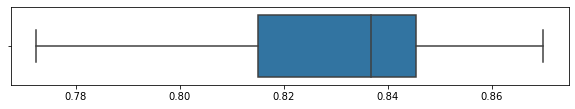

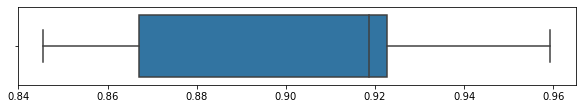

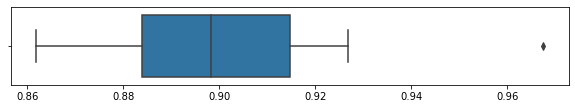

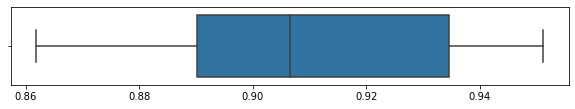

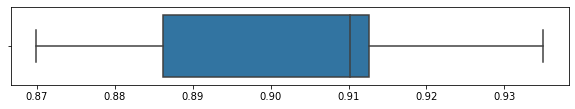

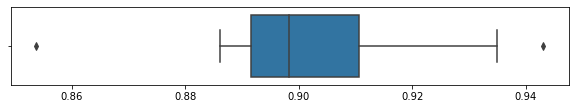

In [310]:
plt.figure(figsize=(10,10)) 
plt.subplot(6,1,1)
sns.boxplot(score_list)
print('')


plt.figure(figsize=(10,10)) 
plt.subplot(6,1,2)
sns.boxplot(score_list2)
print('')

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,3)
sns.boxplot(score_list3)
print('')

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,4)
sns.boxplot(score_list4)
print('')

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,5)
sns.boxplot(score_list5)
print('')

plt.figure(figsize=(10,10)) 
plt.subplot(6,1,6)
sns.boxplot(score_list6)

In [ ]:

# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier

# cv_scores = pd.DataFrame(index=['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8'], 
#                       columns=[1, 10, 50, 100, 500, 1000]) # columns represent number of estimators

# # your answer goes here

# X_Forest =  abt.loc[:, abt.columns != 'class']
# y_Forest =  abt.iloc[:, 8].values

# kf = KFold(n_splits=8, shuffle=True) # Define the split - into 4 folds 
# print( kf.get_n_splits(X_Forest) ) # returns the number of splitting iterations in the cross-validator
# print(kf) 

# for i, ind in enumerate(kf.split(X_Forest)):
#     train_index, test_index = ind[0], ind[1]
    
#     print('\nFold: ', i, '\nTRAIN:', train_index, '\nTEST:', test_index)
#     X_train, X_test = X_Forest[train_index], X_Forest[test_index]
#     y_train, y_test = y_Forest[train_index], y_Forest[test_index]
    
# #Splitting the data as Training and Testing parts we take 20% for testing and 80% for training
# # X_train, X_test, y_train, y_test = train_test_split(X_Forest, y_Forest, test_size = 0.2, random_state = 0)

# print('')

# print('---------------Model 1 with n_estimators of 1  ------------')


# Classifier_Forest1 = RandomForestClassifier(n_estimators=1, criterion='gini')
# Classifier_Forest1.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
# print('')

# #Predicting for Testing Data
# Predicted_Value_Forest1 = Classifier_Forest1.predict(X_test) 
# array1 = np.concatenate((Predicted_Value_Forest1.reshape(len(Predicted_Value_Forest1),1), (y_test.reshape(len(y_test),1) )),1)
# df_RnForest1 = pd.DataFrame(array1,columns=['Predicted_Value_Forest1','Original_Value_Forest'])
# display(df_RnForest1.head(15))
# print('Score is',round(Classifier_Forest1.score(X_test,y_test),4))
# print('')







# # print('---------------Model 2 with n_estimators of 10  ------------')

# # Classifier_Forest2 = RandomForestClassifier(n_estimators=10, criterion='gini')
# # Classifier_Forest2.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
# # print('')
# # #Predicting for Testing Data
# # Predicted_Value_Forest2 = Classifier_Forest2.predict(X_test) 
# # array2 = np.concatenate((Predicted_Value_Forest2.reshape(len(Predicted_Value_Forest2),1), (y_test.reshape(len(y_test),1) )),1)
# # df_RnForest2 = pd.DataFrame(array2,columns=['Predicted_Value_Forest2','Original_Value_Forest'])
# # display(df_RnForest2.head(15))
# # print('Score is',round(Classifier_Forest2.score(X_test,y_test),4))
# # print('')

# # print('---------------Model 3 with n_estimators of 50  ------------')

# # Classifier_Forest3 = RandomForestClassifier(n_estimators=50, criterion='gini')
# # Classifier_Forest3.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
# # print('')
# # #Predicting for Testing Data
# # Predicted_Value_Forest3 = Classifier_Forest3.predict(X_test) 
# # array3 = np.concatenate((Predicted_Value_Forest3.reshape(len(Predicted_Value_Forest3),1), (y_test.reshape(len(y_test),1) )),1)
# # df_RnForest3 = pd.DataFrame(array3,columns=['Predicted_Value_Forest3','Original_Value_Forest'])
# # display(df_RnForest3.head(15))
# # print('Score is',round(Classifier_Forest3.score(X_test,y_test),4))
# # print('')

# # print('---------------Model 4 with n_estimators of 100  ------------')

# # Classifier_Forest4 = RandomForestClassifier(n_estimators=10, criterion='gini')
# # Classifier_Forest4.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
# # print('')
# # #Predicting for Testing Data
# # Predicted_Value_Forest4 = Classifier_Forest4.predict(X_test) 
# # array4 = np.concatenate((Predicted_Value_Forest4.reshape(len(Predicted_Value_Forest4),1), (y_test.reshape(len(y_test),1) )),1)
# # df_RnForest4 = pd.DataFrame(array4,columns=['Predicted_Value_Forest4','Original_Value_Forest'])
# # display(df_RnForest4.head(15))
# # print('Score is',round(Classifier_Forest4.score(X_test,y_test),4))
# # print('')


# # print('---------------Model 5 with n_estimators of 500  ------------')

# # Classifier_Forest5 = RandomForestClassifier(n_estimators=500, criterion='gini')
# # Classifier_Forest5.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
# # print('')
# # #Predicting for Testing Data
# # Predicted_Value_Forest5 = Classifier_Forest5.predict(X_test) 
# # array5 = np.concatenate((Predicted_Value_Forest5.reshape(len(Predicted_Value_Forest5),1), (y_test.reshape(len(y_test),1) )),1)
# # df_RnForest5 = pd.DataFrame(array5,columns=['Predicted_Value_Forest5','Original_Value_Forest'])
# # display(df_RnForest5.head(15))
# # print('Score is',round(Classifier_Forest5.score(X_test,y_test),4))
# # print('')



# # print('---------------Model 6 with n_estimators of 1000  ------------')

# # Classifier_Forest6 = RandomForestClassifier(n_estimators=1000, criterion='gini')
# # Classifier_Forest6.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
# # print('')
# # #Predicting for Testing Data
# # Predicted_Value_Forest6 = Classifier_Forest6.predict(X_test) 
# # array6 = np.concatenate((Predicted_Value_Forest6.reshape(len(Predicted_Value_Forest6),1), (y_test.reshape(len(y_test),1) )),1)
# # df_RnForest6 = pd.DataFrame(array6,columns=['Predicted_Value_Forest6','Original_Value_Forest'])
# # display(df_RnForest6.head(15))
# # print('Score is',round(Classifier_Forest6.score(X_test,y_test),4))

In [ ]:
# answer to bonus question goes here